
# Importing necessary libraries


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
from google.colab import files

# Pre-processing data for visualisation

In [52]:
data_file_path = "Data/churn_prediction.csv"
df = pd.read_csv(data_file_path)
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [53]:
print(df.dtypes)
print(df.shape)

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object
(28382, 21)


In [6]:
#Checking missing values
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [7]:
df_vis = df.copy()
df_vis.dropna(axis=0,inplace=True)

In [8]:
df_vis.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [9]:
# Change datatype for 'dependents' and 'city' columns into int64
df_vis[['dependents','city']] = df_vis[['dependents','city']].astype('int64')

# Change datatype of 'last_transaction' column into datetime
df_vis['last_transaction'] = pd.to_datetime(df_vis['last_transaction'], errors='coerce').fillna('0000-00')
df_vis['last_transaction_period'] = df_vis['last_transaction'].fillna('0000-00')

df_vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24832 entries, 0 to 28381
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     24832 non-null  int64  
 1   vintage                         24832 non-null  int64  
 2   age                             24832 non-null  int64  
 3   gender                          24832 non-null  object 
 4   dependents                      24832 non-null  int64  
 5   occupation                      24832 non-null  object 
 6   city                            24832 non-null  int64  
 7   customer_nw_category            24832 non-null  int64  
 8   branch_code                     24832 non-null  int64  
 9   current_balance                 24832 non-null  float64
 10  previous_month_end_balance      24832 non-null  float64
 11  average_monthly_balance_prevQ   24832 non-null  float64
 12  average_monthly_balance_prevQ2  

In [10]:
df_vis

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,last_transaction_period
0,1,2101,66,Male,0,self_employed,187,2,755,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21 00:00:00,2019-05-21 00:00:00
2,4,2194,31,Male,0,salaried,146,2,41,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0000-00,0000-00
4,6,1579,42,Male,2,self_employed,1494,3,388,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03 00:00:00,2019-11-03 00:00:00
5,7,1923,42,Female,0,self_employed,1096,2,1666,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01 00:00:00,2019-11-01 00:00:00
6,8,2048,72,Male,0,retired,1020,1,1,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24 00:00:00,2019-09-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0,student,1020,2,1207,1076.43,...,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22 00:00:00,2019-10-22 00:00:00
28378,30298,1537,34,Female,0,self_employed,1046,2,223,3844.10,...,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17 00:00:00,2019-12-17 00:00:00
28379,30299,2376,47,Male,0,salaried,1096,2,588,65511.97,...,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31 00:00:00,2019-12-31 00:00:00
28380,30300,1745,50,Male,3,self_employed,1219,3,274,1625.55,...,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,0000-00,0000-00


In [51]:
# Converting cleaned dataframe into a csv file
csv_file_path = 'Data/churn_vis.csv'
df_vis.to_csv(csv_file_path, index= False)

# Uncomment in need of a local copy
# files.download(csv_file_path)

# Find visuals under the visualisation folder

# Pre-processing data for machine learning

In [12]:
df_base = df.copy()

In [13]:
df_base.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [14]:
# One-Hot Encoding
df_base['dependents'].fillna(df_base['dependents'].median(), inplace=True)
df_base = pd.get_dummies(df_base, columns=['gender'], dummy_na=True)
df_base['city'].fillna(df['city'].mode()[0], inplace=True)
# df_base = pd.get_dummies(df_base, columns=['occupation'], dummy_na=True)

In [15]:
# The hierarchy on occupation values require us to use LabelEncoder instead One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_base['occupation'] = label_encoder.fit_transform(df_base['occupation'])

In [16]:
df_base.isnull().sum()

customer_id                       0
vintage                           0
age                               0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
gender_Female                     0
gender_Male                       0
gender_nan                        0
dtype: int64

In [17]:
# Dropping unnecessary columns
df_base = df_base.drop(['customer_id', 'last_transaction'], axis=1)

## Data Splitting

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_base.drop('churn', axis=1), df_base['churn'], test_size=0.2, random_state=42)

In [19]:
target_column = 'churn'

##Training the Models

In [20]:
# Define Models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier()
}

# Results dictionary to store performance metrics
results = {'Model': [], 'Accuracy': []}

In [21]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print(f"Confusion Matrix for {type(model).__name__}:\n")
    print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
    print("="*50 + "\n")

    return accuracy

# Results dictionary to store performance metrics
results = {'Model': [], 'Accuracy': []}

# Iterate over models
for model_name, model in models.items():
    # Store results
    results['Model'].append(model_name)

    # Train, evaluate, and print confusion matrix
    accuracy = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)

    results['Accuracy'].append(accuracy)

Confusion Matrix for DecisionTreeClassifier:

          Predicted 0  Predicted 1
Actual 0         4035          604
Actual 1          562          476

Confusion Matrix for XGBClassifier:

          Predicted 0  Predicted 1
Actual 0         4415          224
Actual 1          565          473

Confusion Matrix for SVC:

          Predicted 0  Predicted 1
Actual 0         4617           22
Actual 1          982           56

Confusion Matrix for GradientBoostingClassifier:

          Predicted 0  Predicted 1
Actual 0         4473          166
Actual 1          597          441

Confusion Matrix for RandomForestClassifier:

          Predicted 0  Predicted 1
Actual 0         4473          166
Actual 1          594          444

Confusion Matrix for KNeighborsClassifier:

          Predicted 0  Predicted 1
Actual 0         4421          218
Actual 1          667          371

Confusion Matrix for GaussianNB:

          Predicted 0  Predicted 1
Actual 0         4593           46
Actual 1  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for LogisticRegression:

          Predicted 0  Predicted 1
Actual 0         4609           30
Actual 1          934          104

Confusion Matrix for MLPClassifier:

          Predicted 0  Predicted 1
Actual 0         3809          830
Actual 1          326          712



In [22]:
# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy
0,Decision Tree,0.794610
1,XGBoost,0.861018
2,SVM,0.823146
3,Gradient Boosting,0.865598
4,Random Forest,0.866126
5,K-Nearest Neighbors,0.844108
6,Naive Bayes,0.814515
7,Logistic Regression,0.830192
8,Neural Network,0.796371


#Experiment1: StandardScaler

In [23]:
# Results dictionary to store performance metrics
scaled_results = {'Model': [], 'Accuracy': []}

# Assuming 'churn' is your target variable
scaled_X = df_base.drop('churn', axis=1)
scaled_y = df_base['churn'].values

# Scale numerical features
numerical_features = scaled_X.columns
scaler = StandardScaler()
scaled_X[numerical_features] = scaler.fit_transform(scaled_X[numerical_features])

In [24]:
# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=42)

# Iterate over models
for model_name, model in models.items():
    # Increase max_iter to address convergence warning
    if 'Logistic Regression' in model_name:
        model = LogisticRegression(max_iter=1000)

    # Train, evaluate, and print confusion matrix
    accuracy = train_and_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

    # Store results inside the loop
    scaled_results['Model'].append(model_name)
    scaled_results['Accuracy'].append(accuracy)

Confusion Matrix for DecisionTreeClassifier:

          Predicted 0  Predicted 1
Actual 0         4039          600
Actual 1          563          475

Confusion Matrix for XGBClassifier:

          Predicted 0  Predicted 1
Actual 0         4415          224
Actual 1          565          473

Confusion Matrix for SVC:

          Predicted 0  Predicted 1
Actual 0         4628           11
Actual 1         1007           31

Confusion Matrix for GradientBoostingClassifier:

          Predicted 0  Predicted 1
Actual 0         4473          166
Actual 1          597          441

Confusion Matrix for RandomForestClassifier:

          Predicted 0  Predicted 1
Actual 0         4483          156
Actual 1          584          454

Confusion Matrix for KNeighborsClassifier:

          Predicted 0  Predicted 1
Actual 0         4474          165
Actual 1          976           62

Confusion Matrix for GaussianNB:

          Predicted 0  Predicted 1
Actual 0         4556           83
Actual 1  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# Display the overall results
results_df_scaled = pd.DataFrame(scaled_results)
results_df_scaled

,Model,Accuracy
0,Decision Tree,0.795138
1,XGBoost,0.861018
2,SVM,0.820680
3,Gradient Boosting,0.865598
4,Random Forest,0.869649
5,K-Nearest Neighbors,0.799014
6,Naive Bayes,0.809583
7,Logistic Regression,0.827021
8,Neural Network,0.861899


# Experiment2: Cross-Validation

In [26]:
from sklearn.model_selection import cross_val_score

# Results dictionary to store performance metrics
cross_val_results = {'Model': [], 'Accuracy': []}

# Iterate over models
for model_name, model in models.items():
    # Increase max_iter to address convergence warning
    if 'Logistic Regression' in model_name:
        model = LogisticRegression(max_iter=1000)
    elif 'Neural Network' in model_name:
        model = MLPClassifier(max_iter=1000)
    # Calculate cross-validation scores for each model
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Store results
    cross_val_results['Model'].append(model_name)
    cross_val_results['Accuracy'].append(cv_scores.mean())

In [27]:
results_df_cross = pd.DataFrame(cross_val_results)
results_df_cross

,Model,Accuracy
0,Decision Tree,0.785554
1,XGBoost,0.860207
2,SVM,0.821185
3,Gradient Boosting,0.864523
4,Random Forest,0.864303
5,K-Nearest Neighbors,0.842370
6,Naive Bayes,0.691125
7,Logistic Regression,0.824840
8,Neural Network,0.713631


#

# Experiment3: Imputers

In [28]:
df_base = df.copy()

In [29]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_base[['dependents','city']] = imputer.fit_transform(df_base[['dependents','city']])

In [30]:
from sklearn.impute import SimpleImputer

s_imp = SimpleImputer(strategy = 'most_frequent')
s_imp = s_imp.fit(df_base[['gender','occupation']])
df_base[['gender','occupation']] = s_imp.transform(df_base[['gender','occupation']])

In [31]:
df_base.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [32]:
#dropping unnecessary columns
df_base = df_base.drop(['customer_id','last_transaction'],axis=1)

In [33]:
# converting into numerical columns
df_base = pd.get_dummies(df_base, columns=['gender'], dummy_na=True)

label_encoder = LabelEncoder()
df_base['occupation'] = label_encoder.fit_transform(df_base['occupation'])

In [34]:
# Results dictionary to store performance metrics
imputted_results = {'Model': [], 'Accuracy': []}

# Assuming 'churn' is your target variable
imputted_X = df_base.drop('churn', axis=1)
imputted_y = df_base['churn'].values

#Applying SMOT and feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler  =MinMaxScaler()
df_scaled = scaler.fit_transform(imputted_X)
imputted_x = pd.DataFrame(df_scaled, columns=imputted_X.columns)

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled,y_resampled = smote.fit_resample(imputted_X,imputted_y)

In [36]:
# Split the data into training and testing sets
X_train_imputted, X_test_imputted, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Iterate over models
for model_name, model in models.items():
    # Train, evaluate, and print confusion matrix
    accuracy = train_and_evaluate_model(model, X_train_imputted, y_train, X_test_imputted, y_test)

    # Store results inside the loop
    imputted_results['Model'].append(model_name)
    imputted_results['Accuracy'].append(accuracy)

Confusion Matrix for DecisionTreeClassifier:

          Predicted 0  Predicted 1
Actual 0         3787          902
Actual 1          724         3836

Confusion Matrix for XGBClassifier:

          Predicted 0  Predicted 1
Actual 0         4337          352
Actual 1          619         3941

Confusion Matrix for SVC:

          Predicted 0  Predicted 1
Actual 0         4144          545
Actual 1         1884         2676

Confusion Matrix for GradientBoostingClassifier:

          Predicted 0  Predicted 1
Actual 0         4297          392
Actual 1          882         3678

Confusion Matrix for RandomForestClassifier:

          Predicted 0  Predicted 1
Actual 0         4316          373
Actual 1          524         4036

Confusion Matrix for KNeighborsClassifier:

          Predicted 0  Predicted 1
Actual 0         3506         1183
Actual 1          241         4319

Confusion Matrix for GaussianNB:

          Predicted 0  Predicted 1
Actual 0         4591           98
Actual 1  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for LogisticRegression:

          Predicted 0  Predicted 1
Actual 0         3990          699
Actual 1         1535         3025

Confusion Matrix for MLPClassifier:

          Predicted 0  Predicted 1
Actual 0         4099          590
Actual 1         1800         2760



In [37]:
results_df_resampled = pd.DataFrame(imputted_results)
results_df_resampled

,Model,Accuracy
0,Decision Tree,0.824197
1,XGBoost,0.895016
2,SVM,0.737377
3,Gradient Boosting,0.862255
4,Random Forest,0.903017
5,K-Nearest Neighbors,0.846037
6,Naive Bayes,0.516705
7,Logistic Regression,0.758460
8,Neural Network,0.741594


# Experiment Comparision

In [38]:
summary_stats_resampled = results_df_resampled.groupby('Model')['Accuracy'].describe()
summary_stats_cross = results_df_cross.groupby('Model')['Accuracy'].describe()
summary_stats_scaled = results_df_scaled.groupby('Model')['Accuracy'].describe()
summary_stats_original = results_df.groupby('Model')['Accuracy'].describe()

# Compare mean accuracy
print("Mean Accuracy Comparison:")
print("---------------------------------")
print("resampled")
print(summary_stats_resampled['mean'])
print("---------------------------------")
print("cross-validated")
print(summary_stats_cross['mean'])
print("---------------------------------")
print("scaled")
print(summary_stats_scaled['mean'])
print("---------------------------------")
print("Originial")
print(summary_stats_original['mean'])

Mean Accuracy Comparison:
---------------------------------
resampled
Model
Decision Tree          0.824197
Gradient Boosting      0.862255
K-Nearest Neighbors    0.846037
Logistic Regression    0.758460
Naive Bayes            0.516705
Neural Network         0.741594
Random Forest          0.903017
SVM                    0.737377
XGBoost                0.895016
Name: mean, dtype: float64
---------------------------------
cross-validated
Model
Decision Tree          0.785554
Gradient Boosting      0.864523
K-Nearest Neighbors    0.842370
Logistic Regression    0.824840
Naive Bayes            0.691125
Neural Network         0.713631
Random Forest          0.864303
SVM                    0.821185
XGBoost                0.860207
Name: mean, dtype: float64
---------------------------------
scaled
Model
Decision Tree          0.795138
Gradient Boosting      0.865598
K-Nearest Neighbors    0.799014
Logistic Regression    0.827021
Naive Bayes            0.809583
Neural Network         0.861899

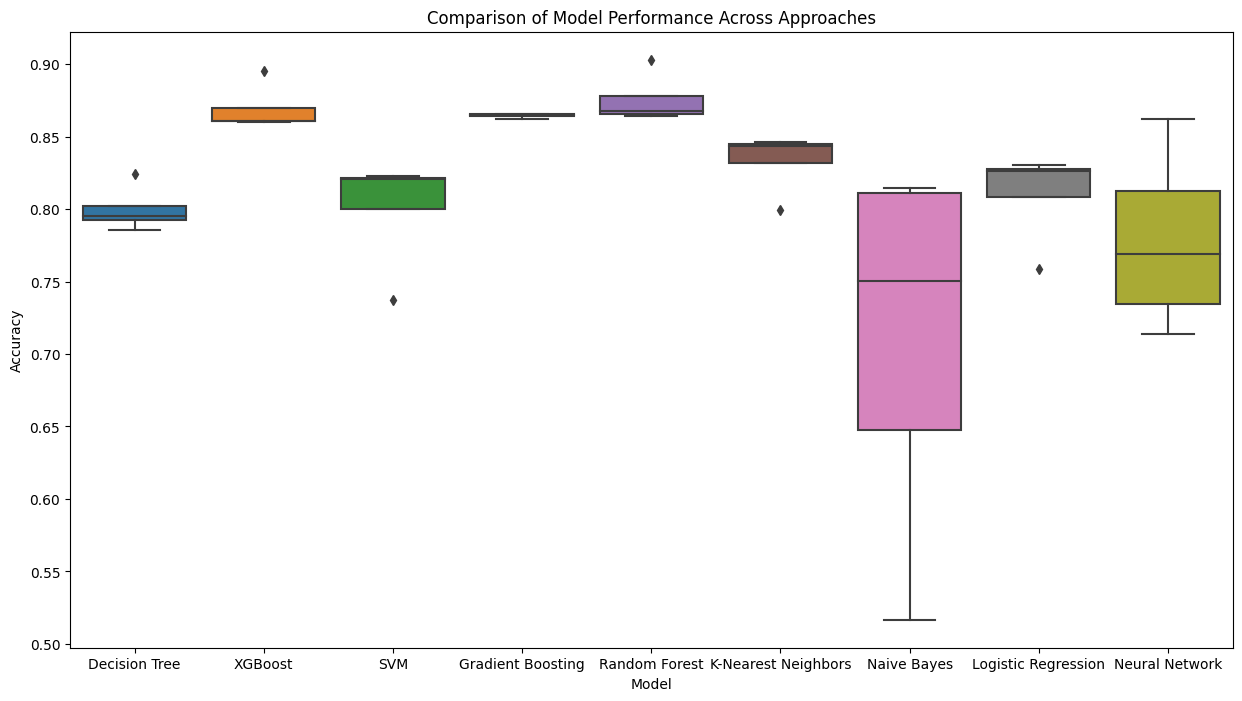

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all results dataframes into one
all_results = pd.concat([results_df_resampled, results_df_cross, results_df_scaled, results_df])

# Visualize the results using a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Model', y='Accuracy', data=all_results)
plt.title('Comparison of Model Performance Across Approaches')
plt.show()

<ipython-input-48-408d36042a3d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=all_results, ci=None)


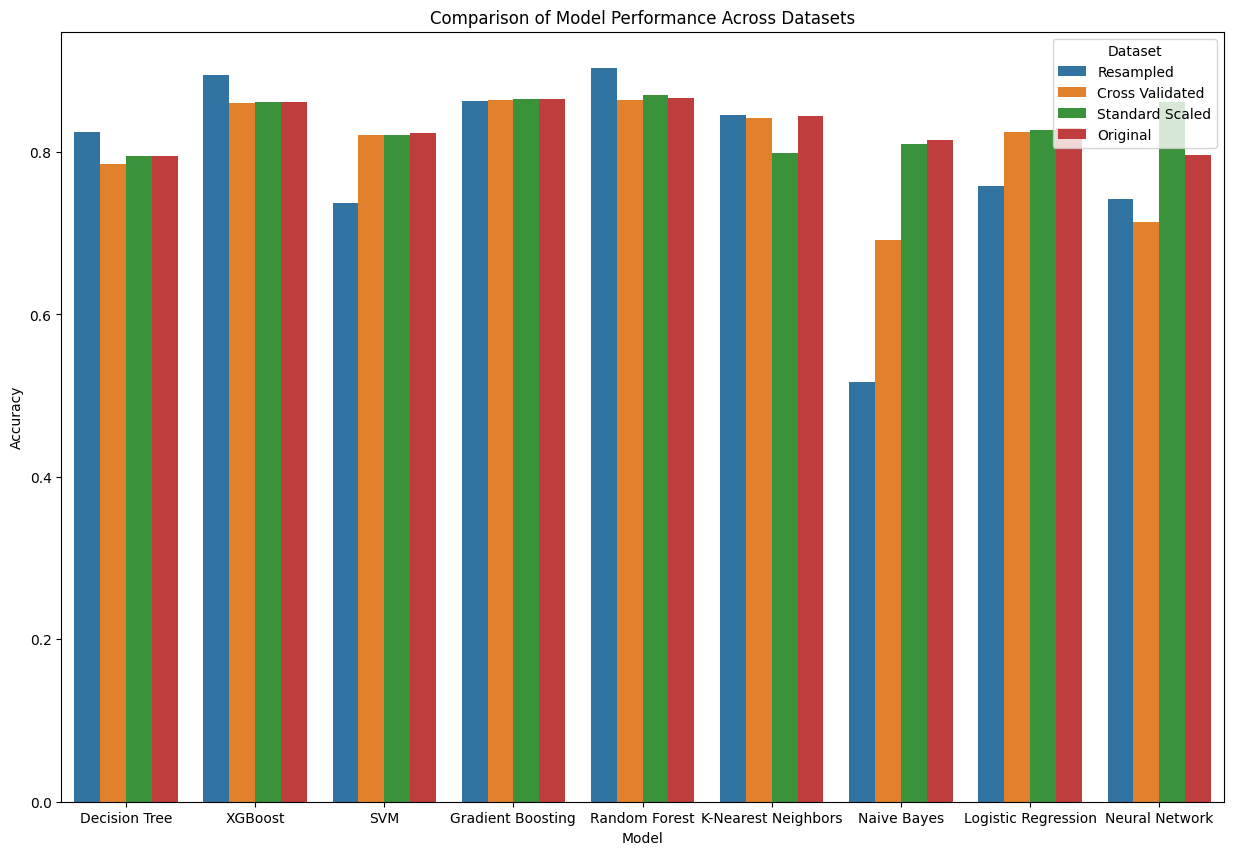

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine all DataFrames into one
all_results = pd.concat([results_df_resampled, results_df_cross, results_df_scaled, results_df])

# Visualize the results using a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=all_results, ci=None)
plt.title('Comparison of Model Performance Across Datasets')
plt.show()

<ipython-input-49-0caf32eb882b>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Model', y='Accuracy', hue='Dataset', data=all_results, ci='sd', dodge=True)


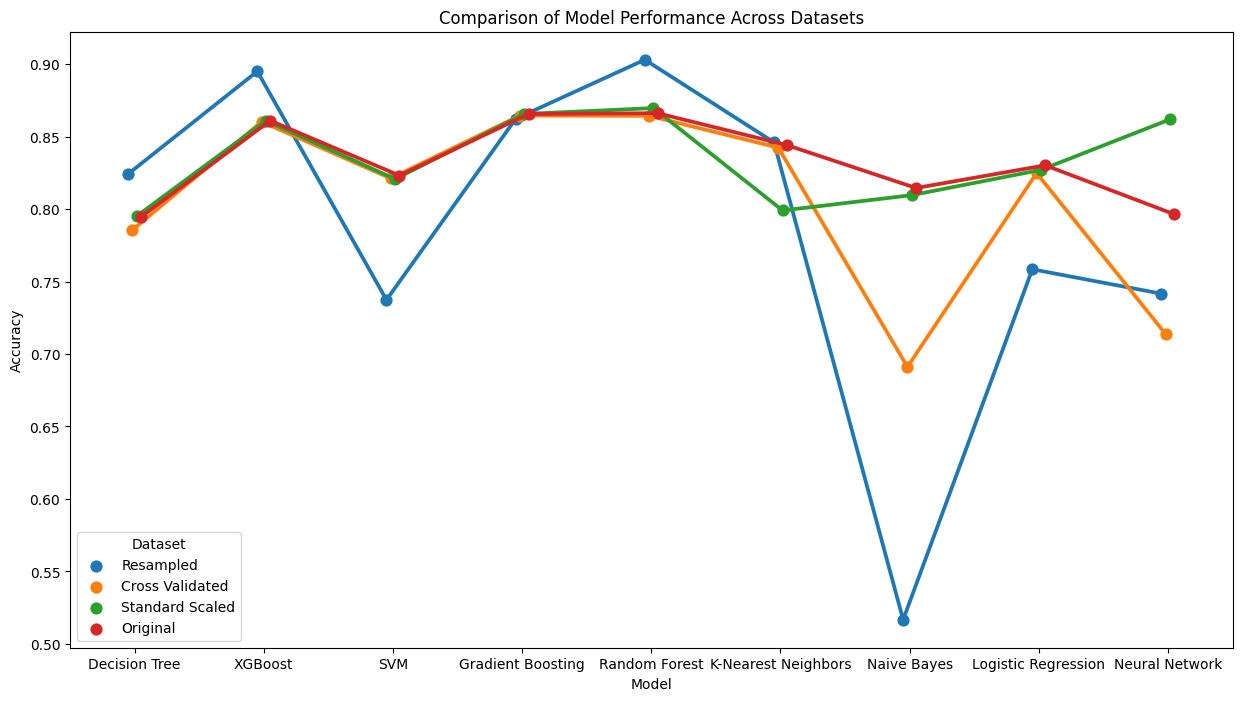

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine all DataFrames into one
all_results = pd.concat([results_df_resampled, results_df_cross, results_df_scaled, results_df])

# Visualize the results using a point plot
plt.figure(figsize=(15, 8))
sns.pointplot(x='Model', y='Accuracy', hue='Dataset', data=all_results, ci='sd', dodge=True)
plt.title('Comparison of Model Performance Across Datasets')
plt.show()

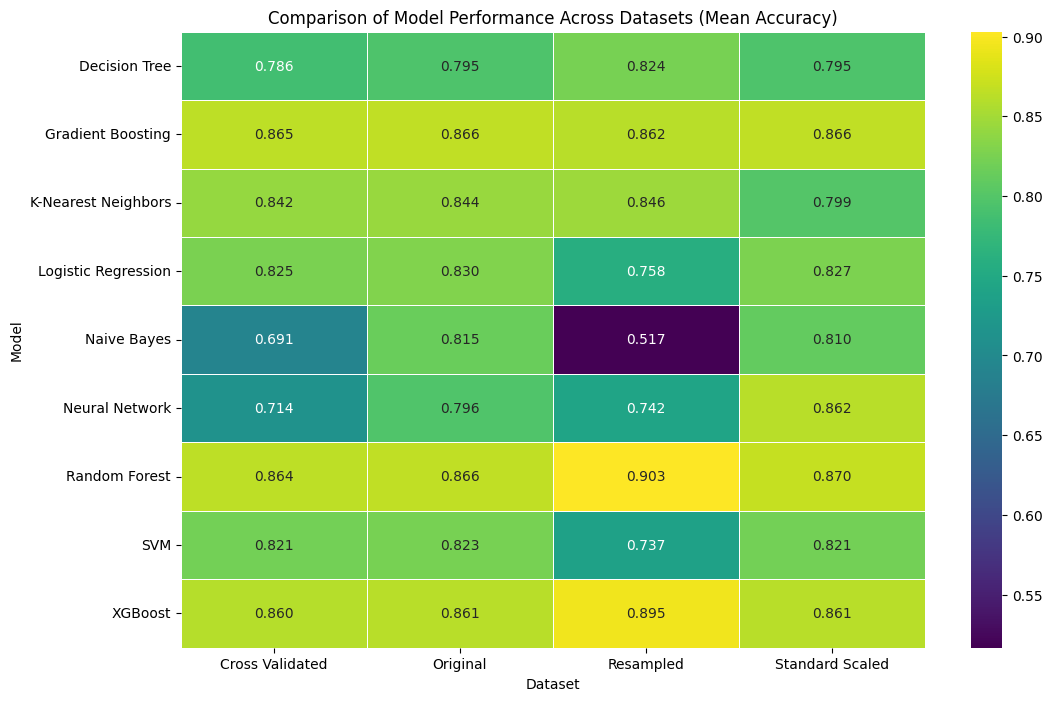

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine all DataFrames into one
all_results = pd.concat([results_df_resampled, results_df_cross, results_df_scaled, results_df])

# Create a pivot table
pivot_table = all_results.pivot_table(index='Model', columns='Dataset', values='Accuracy', aggfunc='mean')

# Visualize the results using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('Comparison of Model Performance Across Datasets (Mean Accuracy)')
plt.show()
